In [1]:
# Системные библиотеки
import sys
import os
import re
import time
from datetime import datetime
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import calendar
import seaborn as sns 

## ЗАГРУЖАЕМ ДАННЫЕ

In [2]:
df = pd.read_csv(r'C:\evator/data.csv', sep=',',encoding=' UTF-8',engine = 'c')
df

,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,payment_type,is_service_delivery,latitude,longitude,make_fast_as_possible,date_of_finish_cooking,date_of_visit,place_id,state,user_count
0,3b182b55-2816-418b-930f-eb30a7e0bee5,1459.0,1749.0,1749.0,437.7,30.0,e0f8cc88-4a5e-4870-b668-50f1a95ca326,bad3d57d-4760-43e3-891f-c6f6fb123499,2019-05-29T12:43:51.299+03:00,long_distance,card-online,True,45.117107,39.037530,True,2019-05-29T13:08:00.000+03:00,2019-05-29T14:00:00.000+03:00,3280e083-900f-44f8-8bbe-a1618d4bc1ae,finished,1
1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,370.0,560.0,560.0,92.5,25.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f2eaebdf-7878-463a-91b9-20616fdcd4cf,2019-06-17T20:18:55.371+03:00,default,cash,True,45.040642,38.981243,True,2019-06-17T20:43:00.000+03:00,2019-06-17T21:05:00.000+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1
2,cccccce8-e75c-4ab3-892d-182ebb0f5776,860.0,1000.0,1000.0,197.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f6ef3117-23fb-4a89-93d6-6a13092c27f6,2019-06-10T18:09:35.273+03:00,default,cash,True,45.037470,38.946109,True,2019-06-10T18:34:00.000+03:00,2019-06-10T19:00:00.000+03:00,16850670-d37c-4647-b529-28911e16695d,finished,0
3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,2860.0,2860.0,2860.0,657.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,2019-06-10T17:38:28.019+03:00,default,card-online,True,45.055747,38.998247,True,2019-06-10T18:03:00.000+03:00,2019-06-10T18:30:00.000+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1
4,70b630d5-c93e-4adf-9db0-01a90ccbae50,350.0,750.0,750.0,0.0,0.0,7f74022a-0930-435d-baf4-d28672d08889,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,2019-06-17T20:23:18.112+03:00,long_distance,cash,True,45.125139,39.012207,True,2019-06-17T20:40:00.000+03:00,2019-06-17T21:20:00.000+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114396,575d8044-c858-4c56-a733-26c3000a9947,570.0,770.0,770.0,114.0,20.0,NaN,cb3ffcd7-29a3-4ea7-9cc9-3af707638411,2018-03-09T11:00:33.531+03:00,default,card-online,True,45.020341,38.960823,True,2018-03-10T10:30:00.000+03:00,2018-03-10T11:00:00.000+03:00,18f6c6e3-d0a1-4ccb-82fb-6976db97ed9e,finished,1
114397,308f4e71-acc1-472f-b537-a08fd2f815b0,950.0,1150.0,1150.0,190.0,20.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,302802b6-e7cc-4f87-8798-7be8b16df83b,2019-02-26T11:50:46.519+03:00,default,cash,True,45.017557,39.052379,True,2019-02-26T12:20:00.000+03:00,2019-02-26T12:50:00.000+03:00,c618b751-d67c-4e02-b6ec-14bb182891a0,finished,0
114398,325cc760-2a43-485c-9dbb-9816c385e005,1005.0,1005.0,1005.0,301.5,30.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,910c43dd-a992-49ae-bb50-2550c72d4e59,2019-02-26T11:47:10.286+03:00,default,cash,True,45.064164,39.042184,True,2019-02-26T12:27:00.000+03:00,2019-02-26T12:50:00.000+03:00,d7e78406-9e78-407d-b257-165844a14ab5,finished,0
114399,068bf7e5-e256-4b85-8b49-9b036bfa2e9c,950.0,1150.0,1150.0,190.0,20.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,302802b6-e7cc-4f87-8798-7be8b16df83b,2019-02-26T11:46:55.097+03:00,default,cash,True,45.035744,39.015540,True,2019-02-26T12:16:00.000+03:00,2019-02-26T09:00:00.000+03:00,c618b751-d67c-4e02-b6ec-14bb182891a0,canceled_bb,1


In [3]:
df.isna().sum()

id                           0
price                        0
full_price                   0
final_price                  0
agent_amount                 0
agent_percent                0
application_id            3300
client_id                    0
created                      0
delivery_type                0
payment_type                 0
is_service_delivery          0
latitude                  1772
longitude                 1772
make_fast_as_possible        0
date_of_finish_cooking       0
date_of_visit                0
place_id                    82
state                        0
user_count                   0
dtype: int64

### СДЕЛАЕМ ПЕРЕМЕННЫЕ ВРЕМЕНИ ТИП ВРЕМЯ

In [4]:
df['date_of_visit'] = df['date_of_visit'].astype('datetime64[ns]')
df['date_of_finish_cooking'] = df['date_of_finish_cooking'].astype('datetime64[ns]')
df['created'] = df['created'].astype('datetime64[ns]')

## СОЗДАДИМ ПЕРЕМЕННЫЕ СКИДКА, ЦЕНА ДОСТАВКИ, ВРЕМЯ ДОСТАВКИ (ПЛАНИРУЕМОЕ)

In [5]:
df['discount'] = df['full_price']- df['final_price']
df['delivery'] = df['full_price']- df['price']
df['time_delivery'] = df['date_of_visit']- df['date_of_finish_cooking']
df['day'] = (pd.to_datetime(df.date_of_visit) - pd.to_datetime(df.date_of_finish_cooking)).dt.days
df['time_minut'] = df['time_delivery'].dt.total_seconds().div(60).astype(int)

### СДЕЛАЕМ ПОРЯДКОВУЮ НУМЕРАЦИЮ МЕСЯЦЕВ, ДНЕМ И ТД

In [6]:
df['n_day'] = df['date_of_visit'].dt.day
df['n_month'] = df['date_of_visit'].dt.month
df['n_year'] = df['date_of_visit'].dt.year
df['n_hour'] = df['date_of_visit'].dt.hour
df['day_of_week_1'] = df['date_of_visit'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week_1'].apply(lambda x: days[x])
df['month'] = df['n_month'] + 12*df['n_year']%(df['n_year'].min())
df

,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,...,time_delivery,day,time_minut,n_day,n_month,n_year,n_hour,day_of_week_1,day_of_week,month
0,3b182b55-2816-418b-930f-eb30a7e0bee5,1459.0,1749.0,1749.0,437.7,30.0,e0f8cc88-4a5e-4870-b668-50f1a95ca326,bad3d57d-4760-43e3-891f-c6f6fb123499,2019-05-29 09:43:51.299,long_distance,...,0 days 00:52:00,0,52,29,5,2019,11,2,Weds,29
1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,370.0,560.0,560.0,92.5,25.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f2eaebdf-7878-463a-91b9-20616fdcd4cf,2019-06-17 17:18:55.371,default,...,0 days 00:22:00,0,22,17,6,2019,18,0,Mon,30
2,cccccce8-e75c-4ab3-892d-182ebb0f5776,860.0,1000.0,1000.0,197.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f6ef3117-23fb-4a89-93d6-6a13092c27f6,2019-06-10 15:09:35.273,default,...,0 days 00:26:00,0,26,10,6,2019,16,0,Mon,30
3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,2860.0,2860.0,2860.0,657.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,2019-06-10 14:38:28.019,default,...,0 days 00:27:00,0,27,10,6,2019,15,0,Mon,30
4,70b630d5-c93e-4adf-9db0-01a90ccbae50,350.0,750.0,750.0,0.0,0.0,7f74022a-0930-435d-baf4-d28672d08889,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,2019-06-17 17:23:18.112,long_distance,...,0 days 00:40:00,0,40,17,6,2019,18,0,Mon,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114396,575d8044-c858-4c56-a733-26c3000a9947,570.0,770.0,770.0,114.0,20.0,NaN,cb3ffcd7-29a3-4ea7-9cc9-3af707638411,2018-03-09 08:00:33.531,default,...,0 days 00:30:00,0,30,10,3,2018,8,5,Sat,15
114397,308f4e71-acc1-472f-b537-a08fd2f815b0,950.0,1150.0,1150.0,190.0,20.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,302802b6-e7cc-4f87-8798-7be8b16df83b,2019-02-26 08:50:46.519,default,...,0 days 00:30:00,0,30,26,2,2019,9,1,Tues,26
114398,325cc760-2a43-485c-9dbb-9816c385e005,1005.0,1005.0,1005.0,301.5,30.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,910c43dd-a992-49ae-bb50-2550c72d4e59,2019-02-26 08:47:10.286,default,...,0 days 00:23:00,0,23,26,2,2019,9,1,Tues,26
114399,068bf7e5-e256-4b85-8b49-9b036bfa2e9c,950.0,1150.0,1150.0,190.0,20.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,302802b6-e7cc-4f87-8798-7be8b16df83b,2019-02-26 08:46:55.097,default,...,-1 days +20:44:00,-1,-196,26,2,2019,6,1,Tues,26


## ПОСМОТРИМ describe

In [8]:
df.describe()

,price,full_price,final_price,agent_amount,agent_percent,latitude,longitude,user_count,discount,delivery,time_delivery,day,time_minut,n_day,n_month,n_year,n_hour,day_of_week_1,month
count,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000,112629.000000,112629.000000,114401.000000,114401.000000,114401.000000,114401,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000,114401.000000
mean,1240.918106,1330.986033,1313.523591,267.641833,22.103076,45.045262,38.981595,1.364551,17.462442,90.067928,-1 days +23:59:15.777650546,-0.033986,-0.736008,16.014213,6.199937,2018.561114,13.941862,3.223259,24.933305
std,953.548894,947.082479,951.273903,207.322601,7.519289,0.022572,0.036647,2.153561,100.205074,129.248693,0 days 03:01:52.060312524,0.195979,181.862199,8.722964,3.390121,0.504862,3.709243,1.987990,4.261965
min,0.000000,0.000000,0.000000,0.000000,0.000000,44.953519,38.794940,0.000000,0.000000,-6029.260000,-2 days +00:30:00,-2.000000,-2850.000000,1.000000,1.000000,2017.000000,0.000000,0.000000,8.000000
25%,680.000000,790.000000,770.000000,150.000000,20.000000,45.028183,38.959074,1.000000,0.000000,0.000000,0 days 00:23:00,0.000000,23.000000,9.000000,3.000000,2018.000000,11.000000,2.000000,22.000000
50%,1050.000000,1130.000000,1115.000000,225.000000,23.000000,45.042215,38.973166,1.000000,0.000000,0.000000,0 days 00:27:00,0.000000,27.000000,16.000000,6.000000,2019.000000,14.000000,3.000000,25.000000
75%,1510.000000,1580.000000,1570.000000,333.000000,30.000000,45.060095,39.005326,1.000000,0.000000,200.000000,0 days 00:31:00,0.000000,31.000000,24.000000,9.000000,2019.000000,17.000000,5.000000,28.000000
max,32830.000000,32830.000000,32830.000000,6566.000000,32.000000,45.177498,39.202120,620.000000,5382.000000,600.000000,7 days 00:25:00,7.000000,10105.000000,31.000000,12.000000,2019.000000,23.000000,6.000000,31.000000


## ВИДНО ЧТО ЕСТЬ ОТРИЦАТЕЛЬНОЕ ВРЕМЯ ДОСТАВКИ, УБЕРЕМ ЭТИ СТРОЧКИ ИЗ РАССМОТРЕНИЯ

In [11]:
df = df.loc[df['day']>-1]

In [12]:
df.describe(include=['object'])

,id,application_id,client_id,delivery_type,payment_type,place_id,state,day_of_week
count,110787,107488,110787,110787,110787,110710,110787,110787
unique,110787,5,24972,5,7,507,4,7
top,f747b6b8-8e0f-4a51-a7b9-596780bfa027,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,ed1fe1ba-183e-437c-8262-0e058ffb70cb,default,cash,16850670-d37c-4647-b529-28911e16695d,finished,Sat
freq,1,69067,951,93651,38353,11571,108451,18102


In [13]:
df.state.unique()

array(['finished', 'canceled_place', 'canceled_bb', 'canceled'],
      dtype=object)

In [14]:
df.make_fast_as_possible.unique()

array([ True, False])

## ПОСМОТРИМ СКОЛЬКО ЛЮДЕЙ ПОЛЬЗУЮТСЯ РАЗНЫМИ ПРИЛОЖЕНИЯМИ В РАЗНЫХ МЕСЯЦАХ

In [15]:
svod_app = pd.pivot_table(df,index = 'application_id',columns = 'month',values = 'full_price',aggfunc = 'count')
svod_app

month,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
application_id,,,,,,,,,,,,,,,,
3d8844af-8166-4397-ba49-63bd008a76d7,NaN,NaN,NaN,NaN,NaN,NaN,281.0,1790.0,2361.0,2056.0,141.0,NaN,NaN,NaN,NaN,NaN
7f74022a-0930-435d-baf4-d28672d08889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,107.0,326.0,577.0,636.0,586.0,582.0,622.0,507.0
adb21ae9-8f0e-48ee-816c-e85572ff6fbb,825.0,1788.0,2353.0,3033.0,3250.0,3603.0,4328.0,4547.0,4982.0,4772.0,5244.0,6057.0,5732.0,6279.0,6369.0,5905.0
cd7b52a3-f45b-447f-9ad1-11a063020270,24.0,113.0,192.0,419.0,526.0,556.0,778.0,762.0,675.0,523.0,604.0,860.0,843.0,789.0,778.0,662.0
e0f8cc88-4a5e-4870-b668-50f1a95ca326,149.0,367.0,501.0,665.0,827.0,980.0,1212.0,1298.0,1264.0,1251.0,1373.0,1565.0,1709.0,1812.0,1926.0,1760.0


## ПОСТРОИМ ИЗ ЧИСЕЛ ИНДЕКС, ЧТОБЫ ПОСТРОИТЬ ГРАФИК

In [16]:
r = svod_app.T
r = r /r.min(axis = 0)
r
r ['3d8844af-8166-4397-ba49-63bd008a76d7'] = r ['3d8844af-8166-4397-ba49-63bd008a76d7']/1.992908
svod_app = r.T.fillna(0)
svod_app

month,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
application_id,,,,,,,,,,,,,,,,
3d8844af-8166-4397-ba49-63bd008a76d7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.370106,8.402134,7.316725,0.501779,0.000000,0.000000,0.000000,0.000000,0.000000
7f74022a-0930-435d-baf4-d28672d08889,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.244186,3.790698,6.709302,7.395349,6.813953,6.767442,7.232558,5.895349
adb21ae9-8f0e-48ee-816c-e85572ff6fbb,1.0,2.167273,2.852121,3.676364,3.939394,4.367273,5.246061,5.511515,6.038788,5.784242,6.356364,7.341818,6.947879,7.610909,7.720000,7.157576
cd7b52a3-f45b-447f-9ad1-11a063020270,1.0,4.708333,8.000000,17.458333,21.916667,23.166667,32.416667,31.750000,28.125000,21.791667,25.166667,35.833333,35.125000,32.875000,32.416667,27.583333
e0f8cc88-4a5e-4870-b668-50f1a95ca326,1.0,2.463087,3.362416,4.463087,5.550336,6.577181,8.134228,8.711409,8.483221,8.395973,9.214765,10.503356,11.469799,12.161074,12.926174,11.812081


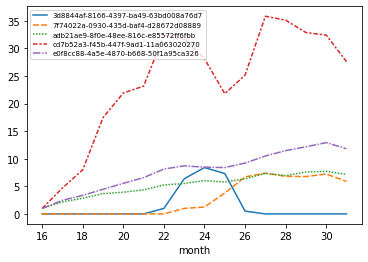

In [17]:
sns.lineplot(data=svod_app.T)
plt.legend(loc=2, prop={'size': 7})
plt.show()

### МЫ ВИДИМ, ЧТО ВСЕ ПРИЛЪОЖЕНИЯ КРОМЕ ОДНОГО АКТИВНЫ (И ДАЖЕ В ОСНОВНОМ РАСТУТ). ОДИН ИЗ СПОСОБОВ УВЕЛИЧЕНИЯ ПРИБЫЛИ СДЕЛАТЬ ПРИЛОЖЕНИЕ ВНОВЬ АКТИВНЫМ

## ИССЛЕДОВАНИЕ ЧАСТОТНОСТИ ЗАКАЗОВ

In [54]:
time_svod = pd.pivot_table(df,index = 'n_hour',  values = 'client_id',aggfunc = 'count').fillna(0)
time_svod

,client_id
n_hour,
0,1
1,5
2,1
4,3
5,17
6,463
7,1976
8,3829
9,7749


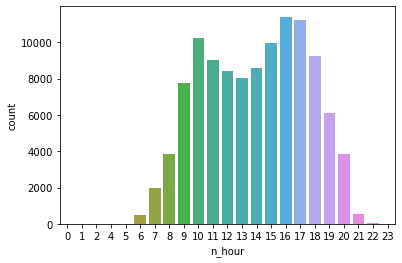

In [55]:
sns.countplot(x='n_hour', data=df)
pass

## САМЫЙ ПИК АКТИВНОСТИ ДОСТАВКИ 16-17 ЧАСОВ, ОДИН ИЗ ВОЗМОЖНЫХ ВАРИАНТОВ ПОЛУЧЕНИЯ ПРИБЫЛИ, ПОПРОБОВАТЬ УВЕЛИЧИТЬ ДОСТАВКУ В БОЛЕЕ ПОЗДНЕЕ ВРЕМЯ 19-21

In [60]:
week_svod= pd.pivot_table(df,index = ['day_of_week_1','day_of_week'],  values = 'client_id',aggfunc = 'count').fillna(0)
week_svod = week_svod.reset_index().drop(['day_of_week_1'],axis = 1)
week_svod

,day_of_week,client_id
0,Mon,13643
1,Tues,13860
2,Weds,14357
3,Thurs,15201
4,Fri,17620
5,Sat,18102
6,Sun,18004


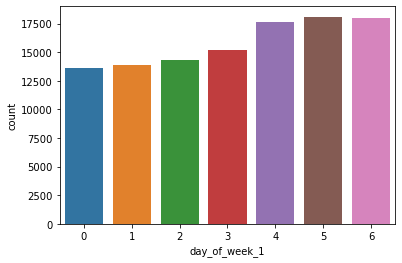

In [59]:
sns.countplot(x='day_of_week_1', data=df)
pass

## ПЯТНИЦА И ВЫХОДНЫЕ ДНИ КАК И ДОЛЖНО БЫТЬ, ИМЕЮТ МАКСИМАЛЬНОЕ ЧИСЛО ЗАКАЗОВ

In [64]:
svod = pd.pivot_table(df,index = 'n_hour', columns = 'day_of_week' , values = 'client_id',aggfunc = 'count').fillna(0)
svod_1 = pd.pivot_table(df,index = 'n_hour', columns = 'day_of_week_1' , values = 'client_id',aggfunc = 'count').fillna(0)
svod

day_of_week,Fri,Mon,Sat,Sun,Thurs,Tues,Weds
n_hour,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,4.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5,2.0,3.0,2.0,2.0,0.0,4.0,4.0
6,48.0,63.0,83.0,62.0,71.0,52.0,84.0
7,282.0,225.0,387.0,347.0,271.0,223.0,241.0
8,633.0,484.0,632.0,630.0,547.0,422.0,481.0
9,1376.0,987.0,1014.0,1003.0,1171.0,1075.0,1123.0


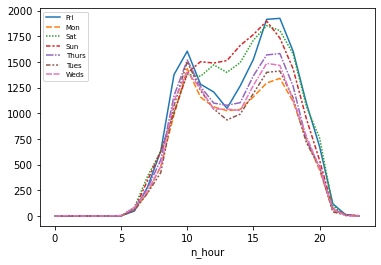

In [67]:
sns.lineplot(data=svod)
plt.legend(loc=2, prop={'size': 7})
plt.show()

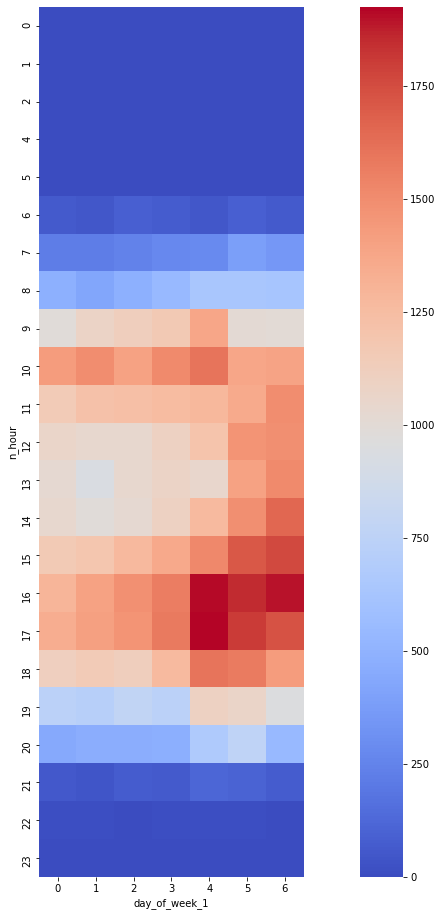

In [65]:
plt.figure(figsize = (20, 16))
sns.heatmap(svod_1, square=True, cmap='coolwarm')
pass

## КАК МЫ ВИДИМ ДНЕВНАЯ ДОСТАВКА В БУДНИ 11-14 НЕ ТАКАЯ СИЛЬНАЯ ПО СРАВНЕНИЮ С ВЫХОДНЫМИ

## СОЗДАДИМ ТАБЛИЦУ ИНФОРМАЦИ ПО ПОЛЬЗОВАТЕЛЮ

In [24]:
df = df.sort_values(by = 'created')
df_client = df.drop_duplicates(subset=['client_id'], keep='last')
df_client = df_client.loc[:,['final_price','discount','delivery','time_delivery','agent_amount','application_id','client_id','created','delivery_type','payment_type','is_service_delivery','make_fast_as_possible','state','user_count','time_minut','month','n_hour']]
df_client

,final_price,discount,delivery,time_delivery,agent_amount,application_id,client_id,created,delivery_type,payment_type,is_service_delivery,make_fast_as_possible,state,user_count,time_minut,month,n_hour
62035,590.0,0.0,0.0,0 days 00:00:00,59.0,NaN,2a495233-c231-4819-8ff0-6766e65a78f5,2017-08-21 10:34:59.683,default,card-online,True,False,finished,1,0,8,13
91267,410.0,0.0,0.0,0 days 00:00:00,53.3,NaN,38c98c00-9b0e-4188-a952-fd60f9d0418a,2017-09-15 18:47:47.766,default,card-online,True,False,finished,1,0,9,19
61094,70.0,0.0,0.0,0 days 00:00:00,7.0,NaN,88b71f30-16c6-477f-97a2-1f4086efc858,2017-09-18 18:01:01.763,default,card-online,True,False,finished,1,0,9,20
60942,1570.0,0.0,0.0,0 days 00:00:00,204.1,NaN,2523775c-543f-46ce-91b4-91f93b0f0e18,2017-09-19 10:28:29.381,default,card-online,True,False,finished,2,0,9,11
60387,350.0,0.0,0.0,0 days 00:00:00,45.5,NaN,079cfafa-afb8-4e84-a391-5a2586b6e687,2017-09-22 09:03:18.488,default,card-online,True,False,finished,1,0,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73275,1870.0,0.0,0.0,0 days 00:29:00,280.5,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,552bafcc-9074-4295-93d9-4ae6a67dd728,2019-07-30 19:36:11.104,restaurant,apple-pay,False,True,finished,1,29,31,20
73281,855.0,0.0,265.0,0 days 00:39:00,106.2,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,5d6c2b7b-f3cc-4acf-a330-edad2f277967,2019-07-30 19:46:37.949,long_distance,cash,True,True,finished,1,39,31,20
73291,2180.0,0.0,0.0,0 days 00:25:00,327.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,999c62f8-6e9c-4563-b210-3de22d3e2910,2019-07-30 20:00:24.686,restaurant,apple-pay,False,True,finished,1,25,31,20
73290,970.0,0.0,140.0,0 days 00:30:00,265.6,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,9bab7c79-bc31-489e-a345-46329a00e565,2019-07-30 20:13:49.341,default,apple-pay,True,True,finished,1,30,31,20


## ПОСТРОИМ СВОДНУЮ ТАБЛИЦУ С НЕКОТОРЫМИ ЗНАЧЕНИЯМИ, СОЗДАДИМ ФУНКЦИЮ АГРЕГАЦИИ

In [25]:
agg_func_math = {
    'final_price': ['count', 'mean'] , 'discount' : ['mean'] , 'time_minut' : ['mean'] , 'user_count': ['mean'],
    'month':['min','max'] , 'n_hour':['mean']
}

## АКТИВНЫМИ НАЗОВОЕМ ТЕХ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ ПОЛЬЗОВАЛИСЬ ДОСТАВКОЙ ХОТЯ БЫ РАЗ В ПОСЛЕДНИЙ МЕСЯЦ

In [29]:
number_order = df.groupby('client_id').agg(agg_func_math).reset_index()
r = number_order.T
r = r.reset_index()
r = r.drop(['level_1','level_0'],axis = 1)
r = r.T
r[6] = r[7]-r[6]+1
r[7] = np.where((r[7] ==r[7].max()), 1, 0)
# r = r.loc[:,:7]

number_order = r
number_order = number_order.rename(columns={0: "client_id", 1: "number_order",2: "mean_price_order", 3: "mean_discount_order",4: "mean_time_order",5:'user_count',6:'time_activity',7:'aktivity',8:'order time'})
for i in number_order.columns[1:]:
#     print(i)
    number_order[i] = number_order[i].astype('float')
number_order

,client_id,number_order,mean_price_order,mean_discount_order,mean_time_order,user_count,time_activity,aktivity,order time
0,00000220-a7ba-45cc-a38d-83cd28e44b4a,1.0,1785.000000,0.0,22.0,3.0,1.0,0.0,15.000000
1,00031ecb-b5a3-4a89-9089-703e0411ddbb,1.0,685.000000,200.0,38.0,1.0,1.0,0.0,12.000000
2,0003a201-62eb-4e53-80cf-a1723c03b232,1.0,599.000000,0.0,22.0,1.0,1.0,0.0,19.000000
3,0003f07c-9b9c-4714-a51c-c5137ad1b537,1.0,765.000000,0.0,26.0,1.0,1.0,0.0,9.000000
4,000565ac-9c98-4f72-a999-d0b75116fb69,7.0,918.285714,0.0,33.0,1.0,6.0,1.0,13.857143
...,...,...,...,...,...,...,...,...,...
24967,fff41a18-a49e-4ab9-8215-60326efa6b80,1.0,855.000000,0.0,20.0,1.0,1.0,0.0,17.000000
24968,fff6fb36-1f50-4db5-8453-2af03b234911,2.0,1440.000000,0.0,32.0,1.5,3.0,0.0,18.000000
24969,fff72486-7117-47d2-944b-53f149d99573,1.0,956.000000,239.0,30.0,4.0,1.0,0.0,10.000000
24970,fff86ae8-402c-43e7-a5aa-3385154f86cd,1.0,320.000000,300.0,22.0,1.0,1.0,1.0,17.000000


## 20 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ

In [31]:
number_order.sort_values('number_order', ascending=False).head(20)

,client_id,number_order,mean_price_order,mean_discount_order,mean_time_order,user_count,time_activity,aktivity,order time
23075,ed1fe1ba-183e-437c-8262-0e058ffb70cb,951.0,1166.805468,98.343849,22.272345,1.055731,24.0,1.0,12.366982
4344,2d868cf8-bf22-424d-9cff-cbf66c01b189,293.0,1084.109215,48.300341,61.914676,1.665529,10.0,0.0,13.829352
3684,26f17bbc-7c45-460f-b40a-865a2859e12d,293.0,449.837031,85.371160,28.395904,1.013652,23.0,1.0,13.010239
9120,5e471ed0-b640-46d2-aaf6-b7db5b55104a,253.0,1506.867589,6.891304,25.071146,1.007905,14.0,1.0,15.379447
1410,0e1dec20-a01e-4bba-a8cd-50ddee9487c6,245.0,520.546939,96.326531,27.502041,1.077551,15.0,1.0,13.232653
3408,23b18acd-2eda-4e90-89c3-95fadb67648a,202.0,1522.024752,8.663366,23.688119,1.366337,10.0,1.0,12.603960
13962,8f3a4b36-f2d5-4bf5-9ede-61dab57236c0,195.0,1838.708974,32.614103,41.717949,1.697436,19.0,1.0,14.815385
19756,cb3ffcd7-29a3-4ea7-9cc9-3af707638411,193.0,2570.284974,0.000000,30.207254,1.062176,18.0,1.0,11.844560
17772,b5cd0388-e6e4-480c-ac52-549ea942c507,187.0,1776.240642,3.262032,29.930481,1.983957,17.0,1.0,10.053476
4031,2a352cd3-5d28-42f3-ad45-76aa846e271c,178.0,857.050562,4.775281,27.191011,0.741573,15.0,1.0,11.477528


In [39]:
aktiv = number_order.groupby(['time_activity','aktivity'])['client_id'].count().reset_index()
svod_aktiv = pd.pivot_table(aktiv,index = 'time_activity', columns = 'aktivity', values = 'client_id',aggfunc = 'sum')
svod_aktiv[0] = svod_aktiv[0].fillna(0)
svod_aktiv['raznost_aktiv'] = svod_aktiv[1] -svod_aktiv[0]
sv = svod_aktiv.iloc[1:,[0,1]]
svod_aktiv

aktivity,0.0,1.0,raznost_aktiv
time_activity,,,
1.0,13668.0,1294.0,-12374.0
2.0,1505.0,231.0,-1274.0
3.0,1031.0,183.0,-848.0
4.0,749.0,184.0,-565.0
5.0,598.0,221.0,-377.0
6.0,564.0,213.0,-351.0
7.0,474.0,212.0,-262.0
8.0,427.0,176.0,-251.0
9.0,359.0,200.0,-159.0


## КАК МЫ ВИДИМ НАЧИНАЯ С 1 ГОДА ПОЛЬЗОВАНИЯ, ПОЛЬЗОВАТЕЛИ ЧАЩЕ ОСТАЮТСЯ ЧЕМ ПОКИДАЮТ СЕРВИС

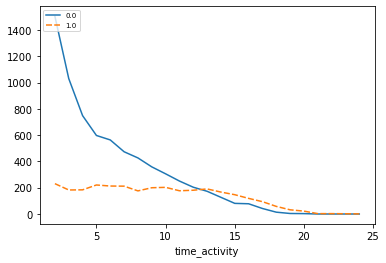

In [40]:
sns.lineplot(data=sv)
plt.legend(loc=2, prop={'size': 7})
plt.show()

In [41]:
number_order.groupby('number_order')['mean_discount_order'].mean().reset_index().sort_values('mean_discount_order', ascending=False).head(20)

,number_order,mean_discount_order
133,951.0,98.343849
130,245.0,96.326531
49,50.0,81.572143
132,293.0,66.835751
0,1.0,55.310540
85,88.0,47.934659
82,83.0,38.595181
128,195.0,32.614103
69,70.0,30.982143
56,57.0,29.178168


In [42]:
number_order.mean_time_order.mean()

28.463400421577454

In [43]:
number_order.groupby('number_order')['mean_time_order'].mean().reset_index()

,number_order,mean_time_order
0,1.0,28.735956
1,2.0,28.219216
2,3.0,28.029175
3,4.0,28.450460
4,5.0,27.858942
...,...,...
129,202.0,23.688119
130,245.0,27.502041
131,253.0,25.071146
132,293.0,45.155290


## КАК МЫ ВИДИМ ВРЕМЯ ДОСТАВКИ ДЛЯ ТЕХ КТО ЗАКАЗЫВАЛ 1-5 РАЗ НЕ ОТЛИЧАЕТСЯ ОТ СРЕДНЕГО, ЗНАЧИТ ВРЕМЯ ДОСТАВКИ НЕ ПРИЧИНА, НЕ ПРОДОЛЖЕНИЯ ЗАКАЗОВ

In [45]:
df.groupby('is_service_delivery')['time_minut'].mean().reset_index()

,is_service_delivery,time_minut
0,False,29.024759
1,True,28.224966


## ОТ КУРЬЕРА ЭТО ТОЖЕ НЕ ЗАВИСИТ

In [52]:
df.groupby('delivery_type')['time_minut'].mean().reset_index()

,delivery_type,time_minut
0,default,27.206212
1,high_demand,29.924253
2,long_distance,35.962717
3,not_available,36.666667
4,restaurant,28.796275


In [53]:
df.groupby('state')['time_minut'].mean().reset_index()

,state,time_minut
0,canceled,41.836957
1,canceled_bb,26.943471
2,canceled_place,26.398785
3,finished,28.277065


## САМОЕ ВЫСОКОЕ ВРЕМЯ ДОСТАВКИ ПО ОТМЕНЕННОМУ ЗАКАЗУ

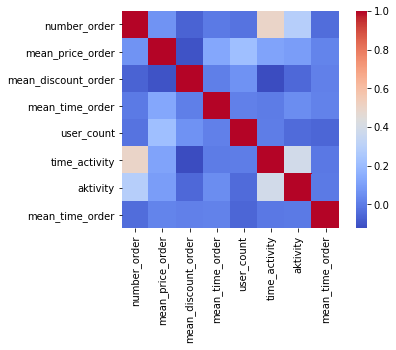

In [27]:
sns.heatmap(number_order.corr(), square=True, cmap='coolwarm')
pass

## НЕТ КОРРЕЛЯЦИЙ

## СДЕЛАЕМ АНАЛИЗ STATE И АКТИВНОСТЬ

In [68]:
number_order = number_order.merge(df_client[['client_id','state']], on = 'client_id', how = 'inner')
number_order

,client_id,number_order,mean_price_order,mean_discount_order,mean_time_order,user_count,time_activity,aktivity,order time,state
0,00000220-a7ba-45cc-a38d-83cd28e44b4a,1.0,1785.000000,0.0,22.0,3.0,1.0,0.0,15.000000,finished
1,00031ecb-b5a3-4a89-9089-703e0411ddbb,1.0,685.000000,200.0,38.0,1.0,1.0,0.0,12.000000,finished
2,0003a201-62eb-4e53-80cf-a1723c03b232,1.0,599.000000,0.0,22.0,1.0,1.0,0.0,19.000000,finished
3,0003f07c-9b9c-4714-a51c-c5137ad1b537,1.0,765.000000,0.0,26.0,1.0,1.0,0.0,9.000000,finished
4,000565ac-9c98-4f72-a999-d0b75116fb69,7.0,918.285714,0.0,33.0,1.0,6.0,1.0,13.857143,finished
...,...,...,...,...,...,...,...,...,...,...
24967,fff41a18-a49e-4ab9-8215-60326efa6b80,1.0,855.000000,0.0,20.0,1.0,1.0,0.0,17.000000,finished
24968,fff6fb36-1f50-4db5-8453-2af03b234911,2.0,1440.000000,0.0,32.0,1.5,3.0,0.0,18.000000,finished
24969,fff72486-7117-47d2-944b-53f149d99573,1.0,956.000000,239.0,30.0,4.0,1.0,0.0,10.000000,finished
24970,fff86ae8-402c-43e7-a5aa-3385154f86cd,1.0,320.000000,300.0,22.0,1.0,1.0,1.0,17.000000,finished


In [70]:
number_order_svod = pd.pivot_table(number_order,index = 'aktivity', columns = 'state', values = 'client_id',aggfunc = 'count').fillna(0)
number_order_svod['foul'] = number_order_svod.iloc[:, 0:3].sum(axis=1)
number_order_svod['ratio'] = number_order_svod['foul']/(number_order_svod['finished'] + number_order_svod['foul'])
number_order_svod = number_order_svod.sort_values(by = 'ratio',ascending=False)
number_order_svod

state,canceled,canceled_bb,canceled_place,finished,foul,ratio
aktivity,,,,,,
1.0,7.0,57.0,57.0,4193.0,121.0,0.028048
0.0,0.0,178.0,131.0,20349.0,309.0,0.014958


## СДЕЛАЕМ КЛАСТЕРИЗАЦИЮ ПОЛЬЗОВАТЕЛЕЙ

### КЛАСТЕРИЗОВАТЬ БУДЕМ ПО КОЛИЧЕСТВУ ЗАКАЗОВ, СРЕДНЕМУ ЧЕКУ И АКТИВНОСТИ

In [72]:
number_order_clast = number_order.loc[:,['client_id','number_order','mean_price_order','aktivity']]
number_order_clast = number_order_clast.set_index('client_id')
data_norm = (number_order_clast - number_order_clast.mean(axis = 0))/number_order_clast.std(axis = 0)

data_norm = data_norm.fillna(0)
number_order_clast

,number_order,mean_price_order,aktivity
client_id,,,
00000220-a7ba-45cc-a38d-83cd28e44b4a,1.0,1785.000000,0.0
00031ecb-b5a3-4a89-9089-703e0411ddbb,1.0,685.000000,0.0
0003a201-62eb-4e53-80cf-a1723c03b232,1.0,599.000000,0.0
0003f07c-9b9c-4714-a51c-c5137ad1b537,1.0,765.000000,0.0
000565ac-9c98-4f72-a999-d0b75116fb69,7.0,918.285714,1.0
...,...,...,...
fff41a18-a49e-4ab9-8215-60326efa6b80,1.0,855.000000,0.0
fff6fb36-1f50-4db5-8453-2af03b234911,2.0,1440.000000,0.0
fff72486-7117-47d2-944b-53f149d99573,1.0,956.000000,0.0


In [94]:
# МЕТОД К СРЕДНИХ
item = 4
from sklearn.cluster import KMeans
m = KMeans(n_clusters= item)
m.fit(data_norm)
all_predict = m.predict(data_norm)
number_order['number_claster']=all_predict
d =m.cluster_centers_
gk = np.reshape(d,(item,3))
col = data_norm.columns
s = pd.DataFrame(gk)
s = s.T
s['name'] = col
s= s.set_index('name')
s

,0,1,2,3
name,,,,
number_order,-0.144616,-0.130443,0.280295,6.145232
mean_price_order,-0.226526,2.597239,0.108337,0.408006
aktivity,-0.456970,-0.287243,2.188242,1.769199


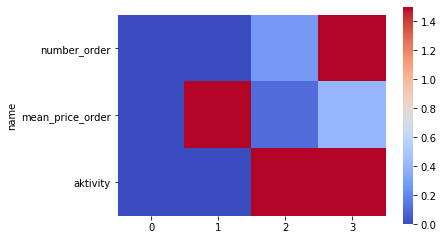

In [95]:
sns.heatmap(s, square=True, cmap='coolwarm', vmin=0, vmax=1.5)
pass

### ПОЛЬЗОВАТЕЛИ РАСПРЕДЕЛИЛИСЬ ПО 4 КАТЕГОРИЯМ

1) СРЕДНИЕ ПОЛЬЗОВАТЕЛИ  
2) ПОЛЬЗОВАТЕЛИ С БОЛЬШИМ СРЕДНИМ ЧЕКОМ  
3) С БОЛЬШОЙ АКТИВНОСТЬЮ НО С МАЛЫМ КОЛИЧЕСТВОМ ЗАКАЗОВ В МЕСЯЦ (КЛАСТЕР ПОСТОЯННЫХ КЛИЕНТОВ)   
4) ПОЛЬЗОВАТЕЛИ С БОЛЬИМ КОЛИЧЕСТВОМ ЗАКАЗОВ И МНОГО МЕСЯЦЕВ АКТИВНОСТИ И ВЫШЕ СРЕДНЕГО СРЕДНИМ ЧЕКОМ (КЛАСТЕР ПОСТОЯННЫХ КЛИЕНТОВ)

In [99]:
number_order['number_claster'].value_counts().reset_index()

,index,number_claster
0,0,19231
1,2,3965
2,1,1473
3,3,303


In [100]:
cluster_svod = pd.pivot_table(number_order,index = 'aktivity', columns = 'number_claster', values = 'client_id',aggfunc = 'count').fillna(0)
cluster_svod

number_claster,0,1,2,3
aktivity,,,,
0.0,19231.0,1379.0,0.0,48.0
1.0,0.0,94.0,3965.0,255.0


## КАК МЫ ВИДИМ КЛАСТЕРЫ ПОСТОЯННЫХ КЛИЕНТОВ (2 и 3) В БОЛЬШЕНСТВЕ СВОИМ НАХОДЯТСЯ В АКТИВНЫХ

## ВОЗМОЖНОЕ РЕШЕНИЕ ДЛЯ КЛАСТЕРА 1, ДАВАТЬ СКИДКИ НА ЗАКАЗЫ, ЧТОБЫ СТАРАТЬСЯ ИХ УДЕРЖИВАТЬ

## ТЕПЕРЬ РАССМОТРИМ ПРИЛОЖЕНИЕ

In [106]:
application_id = df.groupby('application_id').agg(agg_func_math).reset_index()
application_id

application_id final_price                discount  \
                                              count         mean       mean   
0  3d8844af-8166-4397-ba49-63bd008a76d7        6629   708.038618   0.000000   
1  7f74022a-0930-435d-baf4-d28672d08889        4029  1497.170762   0.000000   
2  adb21ae9-8f0e-48ee-816c-e85572ff6fbb       69067  1393.964148  15.572375   
3  cd7b52a3-f45b-447f-9ad1-11a063020270        9104  1283.729097  27.513434   
4  e0f8cc88-4a5e-4870-b668-50f1a95ca326       18659  1221.653334  29.750128   

  time_minut user_count month         n_hour  
        mean       mean   min max       mean  
0  19.042691   1.000000    22  26  13.401871  
1  39.867213   1.003723    23  31  13.841152  
2  28.207465   1.372508    16  31  13.945748  
3  29.785149   1.558216    16  31  13.765488  
4  28.697036   1.427622    16  31  14.019562

In [108]:
r = application_id.T
r = r.reset_index()
r = r.drop(['level_1','level_0'],axis = 1)
r = r.T
r[6] = r[7]-r[6]+1
r[7] = np.where((r[7] ==r[7].max()), 1, 0)
# r = r.loc[:,:7]

application_id = r
application_id = application_id.rename(columns={0: "client_id", 1: "number_order",2: "mean_price_order", 3: "mean_discount_order",4: "mean_time_order",5:'user_count',6:'time_activity',7:'aktivity',8:'order time'})
for i in application_id.columns[1:]:
#     print(i)
    application_id[i] = application_id[i].astype('float')
application_id

,client_id,number_order,mean_price_order,mean_discount_order,mean_time_order,user_count,time_activity,aktivity,order time
0,3d8844af-8166-4397-ba49-63bd008a76d7,6629.0,708.038618,0.000000,19.042691,1.000000,5.0,0.0,13.401871
1,7f74022a-0930-435d-baf4-d28672d08889,4029.0,1497.170762,0.000000,39.867213,1.003723,9.0,1.0,13.841152
2,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,69067.0,1393.964148,15.572375,28.207465,1.372508,16.0,1.0,13.945748
3,cd7b52a3-f45b-447f-9ad1-11a063020270,9104.0,1283.729097,27.513434,29.785149,1.558216,16.0,1.0,13.765488
4,e0f8cc88-4a5e-4870-b668-50f1a95ca326,18659.0,1221.653334,29.750128,28.697036,1.427622,16.0,1.0,14.019562


## ПО ОДНОМУ ИЗ ПРИЛОЖЕНИЙ ВРЕМЯ ДОСТАВКИ 40 МИНУТ, ВОЗМОЖНО СТОИТ УЛУЧШИТЬ ВРЕМЯ ДОСТАВКИ ПО НЕМУ

## РАССМОТРИМ КАК РАСПРЕДЕЛЯЮТСЯ ЗАКАЗЫ И ИХ СТАТУС ПО ВРЕМЕНИ ДОСТАВКИ

In [101]:
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df

,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,...,time_delivery,day,time_minut,n_day,n_month,n_year,n_hour,day_of_week_1,day_of_week,month
0,ca74a17e-1120-4152-a0c3-8c7a0bf0dda8,1610.0,1610.0,1610.0,161.0,10.0,NaN,ed1fe1ba-183e-437c-8262-0e058ffb70cb,2017-08-15 10:18:16.390,default,...,0 days 00:00:00,0,0,15,8,2017,14,1,Tues,8
1,ef2a86f5-3d1b-4544-b06a-71d975ef0cb2,490.0,490.0,490.0,49.0,10.0,NaN,ed1fe1ba-183e-437c-8262-0e058ffb70cb,2017-08-15 14:00:18.152,default,...,0 days 00:00:00,0,0,15,8,2017,17,1,Tues,8
2,5f86845f-bed9-4ccb-8d91-46477b7f0ce8,1280.0,1280.0,1280.0,166.4,13.0,NaN,ed1fe1ba-183e-437c-8262-0e058ffb70cb,2017-08-15 15:11:41.341,default,...,0 days 00:00:00,0,0,15,8,2017,18,1,Tues,8
3,52bc109f-f0d0-441d-b815-0d8f392f98c3,2250.0,2250.0,2250.0,225.0,10.0,NaN,ed1fe1ba-183e-437c-8262-0e058ffb70cb,2017-08-16 13:09:03.027,default,...,0 days 00:00:00,0,0,16,8,2017,16,2,Weds,8
4,c4bfba1b-4ca1-47eb-bb50-d4ea6de80d23,45.0,45.0,45.0,4.5,10.0,NaN,ed1fe1ba-183e-437c-8262-0e058ffb70cb,2017-08-17 20:28:17.580,default,...,0 days 00:00:00,0,0,17,8,2017,23,3,Thurs,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110782,a1063a63-914b-4d14-9c87-56f24ce6b3ee,1870.0,1870.0,1870.0,280.5,15.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,552bafcc-9074-4295-93d9-4ae6a67dd728,2019-07-30 19:36:11.104,restaurant,...,0 days 00:29:00,0,29,30,7,2019,20,1,Tues,31
110783,b4c65b55-1760-4eee-b3bd-1085b202b251,590.0,855.0,855.0,106.2,18.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,5d6c2b7b-f3cc-4acf-a330-edad2f277967,2019-07-30 19:46:37.949,long_distance,...,0 days 00:39:00,0,39,30,7,2019,20,1,Tues,31
110784,9f622082-d0ec-4bd5-a6f4-2e6eea3205b0,2180.0,2180.0,2180.0,327.0,15.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,999c62f8-6e9c-4563-b210-3de22d3e2910,2019-07-30 20:00:24.686,restaurant,...,0 days 00:25:00,0,25,30,7,2019,20,1,Tues,31
110785,8437aa10-e7ac-4315-9be4-5743ec8468ca,830.0,970.0,970.0,265.6,32.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,9bab7c79-bc31-489e-a345-46329a00e565,2019-07-30 20:13:49.341,default,...,0 days 00:30:00,0,30,30,7,2019,20,1,Tues,31


In [104]:
rez=df.groupby(by='state').resample('15Min',on='time_delivery')['id'].count()
rez = pd.DataFrame(rez).reset_index()
rez = rez.loc[rez['id']>0]
rez = pd.pivot_table(rez,index = 'time_delivery',columns = 'state', values = 'id', aggfunc = 'sum').fillna(0)
rez

state,canceled,canceled_bb,canceled_place,finished
time_delivery,,,,
0 days 00:00:00,45.0,64.0,78.0,993.0
0 days 00:15:00,0.0,594.0,425.0,62857.0
0 days 00:30:00,38.0,555.0,460.0,43031.0
0 days 00:45:00,6.0,39.0,15.0,1306.0
0 days 01:00:00,2.0,2.0,8.0,132.0
0 days 01:15:00,0.0,0.0,0.0,25.0
0 days 01:30:00,0.0,0.0,0.0,33.0
0 days 01:45:00,0.0,0.0,1.0,10.0
0 days 02:00:00,0.0,0.0,0.0,7.0


## КАК МЫ ВИДИМ, В ОСНОВНОМ ЗАКАЗЫ ДОСТАВЛЯЮТСЯ ЗА 15-30 МИНУТ